# Final Project: Fifa 2019 Player Analysis
Komalvir Singh, Muayad Albazian, and Avery Johnson

# Part 1: Predicting Player Position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import svm
import warnings
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo','Loaned From'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null 

## Handle Null Values
Here we are handling null values by applying means and replacing values with what makes sense for the data. We had initially removed all null values, but ended up losing a good portion of our data.

In [5]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('155lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [6]:
df.fillna(0, inplace = True)

In [7]:
df.Weight = [x.strip().replace('lbs', '') for x in df.Weight]
df.Weight = df.Weight.astype('int')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 84 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-null object
Body Type                   18207 non-null object
Real Face                   18207 non-null object
Position                    18207 non-null 

We created a new data frame that had already been cleaned for other portions of the project.

In [9]:
true_df = df

## Group Stats
Stats are grouped into 7 different groups. These groups allow for us to use less features. We will be doing a comparison between running the clustering on these 7 features and using all features as a whole.

In [10]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [11]:
df['Defending'] = df.apply(defending, axis = 1)
df['General'] = df.apply(general, axis = 1)
df['Mental'] = df.apply(mental, axis = 1)
df['Passing'] = df.apply(passing, axis = 1)
df['Mobility'] = df.apply(mobility, axis = 1)
df['Power'] = df.apply(power, axis = 1)
df['Rating'] = df.apply(rating, axis = 1)
df['Shooting'] = df.apply(shooting, axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 92 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-null object
Body Type                   18207 non-null object
Real Face                   18207 non-null object
Position                    18207 non-null 

Here we are listing the best players for several player attributes. This is to give us a better understanding of the data.

In [13]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [14]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,13.0,€196.4M,59,79,81,92,81,76,92,85
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,2280,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,...,37.0,€164M,48,85,78,74,84,81,91,87
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,2201,...,11.0,€104.6M,90,78,77,74,78,82,91,68
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,1331,...,89.0,€144.5M,19,14,41,23,64,61,92,14


Cleaning some of values so that we can interpret them

In [15]:
 def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [16]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKReflexes,Release Clause,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,8.0,€226.5M,29,89,71,87,91,74,94,88
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,11.0,€127.1M,27,88,73,81,91,83,94,88
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,11.0,€228.1M,28,85,72,80,94,69,92,84
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,94.0,€138.6M,16,26,43,39,66,54,92,21
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,13.0,€196.4M,59,79,81,92,81,76,92,85
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,...,8.0,€172.1M,28,83,72,84,92,75,91,82
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,...,9.0,€137.4M,70,81,80,89,84,77,91,78
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,...,37.0,€164M,48,85,78,74,84,81,91,87
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,2201,...,11.0,€104.6M,90,78,77,74,78,82,91,68
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,1331,...,89.0,€144.5M,19,14,41,23,64,61,92,14


Grouping broad positions into more specific ones.
Goalkeeper, Defender, Defensive Midfielder, Midfielder, Attacking Midfielder, Striker

In [17]:
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [18]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

In [19]:
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

In [20]:
df1 = df.copy()

In [21]:
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

In [22]:
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Simple_Position,Major_Nation
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,...,29,89,71,87,91,74,94,88,ST,1
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000000.0,405000.0,2228,5.0,...,27,88,73,81,91,83,94,88,ST,1
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,...,28,85,72,80,94,69,92,84,AM,1
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,1471,4.0,...,16,26,43,39,66,54,92,21,GK,1
4,192985,K. De Bruyne,27,91,92,Manchester City,102000000.0,355000.0,2281,4.0,...,59,79,81,92,81,76,92,85,MF,1


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Body Type                   18207 non-null object
Jersey Number               18207 non-null float64
Joined                      18207 non-null object
Contract Valid Until        18207 non-null object
Height                      18207 non-null object
Weight                      18207 non-nu

In [24]:
df1['Simple_Position'].value_counts()

DF    5866
MF    4399
ST    2727
GK    2025
AM    1751
DM    1439
Name: Simple_Position, dtype: int64

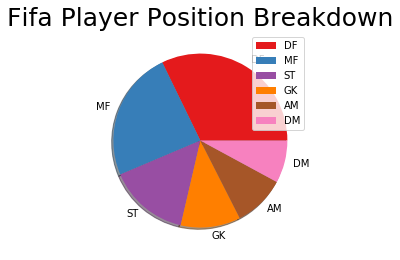

In [25]:
import matplotlib.pyplot as plt
labels = ['DF', 'MF', 'ST', 'GK', 'AM', 'DM']
sizes = [5866, 4399, 2727, 2025, 1751, 1439]

cs = cm.Set1(np.arange(6)/6.)
theme = plt.get_cmap('bwr')

plt.pie(sizes, labels = labels, colors = cs, shadow = True)
plt.title('Fifa Player Position Breakdown', fontsize = 25)
plt.legend()
plt.show()

In [26]:
df2 = df1
test_df = df1.groupby('Simple_Position')['ID'].nunique()
print (test_df)

Simple_Position
AM    1751
DF    5866
DM    1439
GK    2025
MF    4399
ST    2727
Name: ID, dtype: int64


Drop all columns that are non-numeric for better algorithm analysis.

In [27]:
non_floats = []
for col in df1:
    if df1[col].dtypes == "object":
        non_floats.append(col)
num_df = df1.drop(columns=non_floats)

In [28]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
ID                          18207 non-null int64
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Jersey Number               18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 no

In [29]:
num_df.head()
num_df.drop(['Major_Nation','Rating','Jersey Number','Age'],axis=1,inplace=True)

In [30]:
test_df = df2.groupby('Simple_Position')['ID'].nunique()
print (test_df)

Simple_Position
AM    1751
DF    5866
DM    1439
GK    2025
MF    4399
ST    2727
Name: ID, dtype: int64


In [31]:
df_pos = df1[['ID','Simple_Position']]
df_pos

,ID,Simple_Position
0,158023,ST
1,20801,ST
2,190871,AM
3,193080,GK
4,192985,MF
5,183277,ST
6,177003,MF
7,176580,ST
8,155862,DF
9,200389,GK


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Body Type                   18207 non-null object
Jersey Number               18207 non-null float64
Joined                      18207 non-null object
Contract Valid Until        18207 non-null object
Height                      18207 non-null object
Weight                      18207 non-nu

In [33]:
num_df.info()
num_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 51 columns):
ID                          18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 

,ID,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Weight,...,GKKicking,GKPositioning,GKReflexes,Defending,General,Mental,Passing,Mobility,Power,Shooting
0,158023,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,159,...,15.0,14.0,8.0,29,89,71,87,91,74,88
1,20801,94,94,77000000.0,405000.0,2228,5.0,4.0,5.0,183,...,15.0,14.0,11.0,27,88,73,81,91,83,88
2,190871,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,150,...,15.0,15.0,11.0,28,85,72,80,94,69,84
3,193080,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,168,...,87.0,88.0,94.0,16,26,43,39,66,54,21
4,192985,91,92,102000000.0,355000.0,2281,4.0,5.0,4.0,154,...,5.0,10.0,13.0,59,79,81,92,81,76,85
5,183277,91,91,93000000.0,340000.0,2142,4.0,4.0,4.0,163,...,6.0,8.0,8.0,28,83,72,84,92,75,82
6,177003,91,91,67000000.0,420000.0,2280,4.0,4.0,4.0,146,...,7.0,14.0,9.0,70,81,80,89,84,77,78
7,176580,91,91,80000000.0,455000.0,2346,5.0,4.0,3.0,190,...,31.0,33.0,37.0,48,85,78,74,84,81,87
8,155862,91,91,51000000.0,380000.0,2201,4.0,3.0,3.0,181,...,9.0,7.0,11.0,90,78,77,74,78,82,68
9,200389,90,93,68000000.0,94000.0,1331,3.0,3.0,1.0,192,...,78.0,88.0,89.0,19,14,41,23,64,61,14


In [34]:
X = num_df
y = df1['Simple_Position'].values

In [35]:
X.shape

(18207, 51)

In [36]:
y.shape

(18207,)

In [37]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [38]:
knn = KNeighborsClassifier(n_neighbors=6)

# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [39]:
y_pred = knn.predict(X_test) 

In [40]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 49 153  14  11 108  30]
 [109 693  52  77 189  67]
 [ 23 151  13  12  62  13]
 [ 24 195  16  85  68  24]
 [ 94 389  28  30 242  54]
 [ 67 266  21  19 140  54]]
              precision    recall  f1-score   support

          AM       0.13      0.13      0.13       365
          DF       0.38      0.58      0.46      1187
          DM       0.09      0.05      0.06       274
          GK       0.36      0.21      0.26       412
          MF       0.30      0.29      0.29       837
          ST       0.22      0.10      0.13       567

   micro avg       0.31      0.31      0.31      3642
   macro avg       0.25      0.23      0.22      3642
weighted avg       0.29      0.31      0.29      3642



## KNN w/ dropped columns and normalization

In [41]:
new_df = num_df
new_df = new_df.drop(new_df.columns.difference(['Defending', 'General', 'Mental', 'Passing', 'Mobility',
       'Power', 'Rating', 'Shooting', 'Value' , 'Wage']), axis=1)

In [42]:
x = new_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled)

In [43]:
X = new_df
y = df1['Simple_Position'].values

In [44]:
X.shape

(18207, 9)

In [45]:
y.shape

(18207,)

In [46]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [47]:
knn = KNeighborsClassifier(n_neighbors=6)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [48]:
y_pred = knn.predict(X_test)

In [49]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 256   17    5    0  354   71]
 [   3 2131   91    0  100    1]
 [   5  287  134    0  170    0]
 [   0    0    0  809    0    0]
 [ 296  235  109    0 1034   79]
 [  93    4    0    0  114  885]]
              precision    recall  f1-score   support

          AM       0.39      0.36      0.38       703
          DF       0.80      0.92      0.85      2326
          DM       0.40      0.22      0.29       596
          GK       1.00      1.00      1.00       809
          MF       0.58      0.59      0.59      1753
          ST       0.85      0.81      0.83      1096

   micro avg       0.72      0.72      0.72      7283
   macro avg       0.67      0.65      0.66      7283
weighted avg       0.70      0.72      0.71      7283



## Extra Experiment: Predicting Player Position Using SVM

In [50]:
warnings.filterwarnings('ignore')
svm_clf = svm.SVC(gamma='auto')
svm_clf.fit(X_train,y_train)


y_pred = svm_clf.predict(X_test)

print("test", y_test)
print("pred", y_pred)


test ['GK' 'ST' 'GK' ... 'MF' 'GK' 'AM']
pred ['GK' 'ST' 'GK' ... 'DF' 'GK' 'DF']


In [51]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[   2   13    0    0  585  103]
 [   0 2222    0    0  104    0]
 [   0  417    0    0  179    0]
 [   0    0    0  809    0    0]
 [   1  298    0    0 1359   95]
 [   0    3    0    0  150  943]]
              precision    recall  f1-score   support

          AM       0.67      0.00      0.01       703
          DF       0.75      0.96      0.84      2326
          DM       0.00      0.00      0.00       596
          GK       1.00      1.00      1.00       809
          MF       0.57      0.78      0.66      1753
          ST       0.83      0.86      0.84      1096

   micro avg       0.73      0.73      0.73      7283
   macro avg       0.64      0.60      0.56      7283
weighted avg       0.68      0.73      0.67      7283



In [52]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.6657655041407267

Ignore errors in scores.

In [53]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.7251039579268599

## Extra Experiment: Check Whether Player is Goalkeeper or Not

Since we are able to predict goalkeeper with great results, let's predict whether a player is goalkeeper or not by using regression.

In [54]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 51 columns):
ID                          18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 

Replace values with 0 or 1. We must then convert the array to type int so our regression algorithm will work properly.

In [55]:
y[y == "GK"] = 1
y[y == "ST"] = 0
y[y == "AM"] = 0
y[y == "DF"] = 0
y[y == "DM"] = 0
y[y == "MF"] = 0

In [56]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [57]:
regr_df = num_df

In [58]:
regr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 51 columns):
ID                          18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 

In [59]:
x = regr_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
regr_df = pd.DataFrame(x_scaled)

In [60]:
y.shape

(18207,)

In [61]:
y = y.astype('int')

In [62]:
X = regr_df

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [64]:
import sklearn.linear_model as linear_model
lr_clf = linear_model.LogisticRegression(solver='liblinear', multi_class='ovr')
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

In [65]:
print("test", y_test)
print("pred", y_pred)

test [0 0 0 ... 0 0 1]
pred [0 0 0 ... 0 0 1]


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6483
           1       1.00      1.00      1.00       800

   micro avg       1.00      1.00      1.00      7283
   macro avg       1.00      1.00      1.00      7283
weighted avg       1.00      1.00      1.00      7283



# Part 2: Predicting Player Skill Level

## Predict Player Skill Level

In [67]:
df = df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Body Type                   18207 non-null object
Jersey Number               18207 non-null float64
Joined                      18207 non-null object
Contract Valid Until        18207 non-null object
Height                      18207 non-null object
Weight                      18207 non-nu

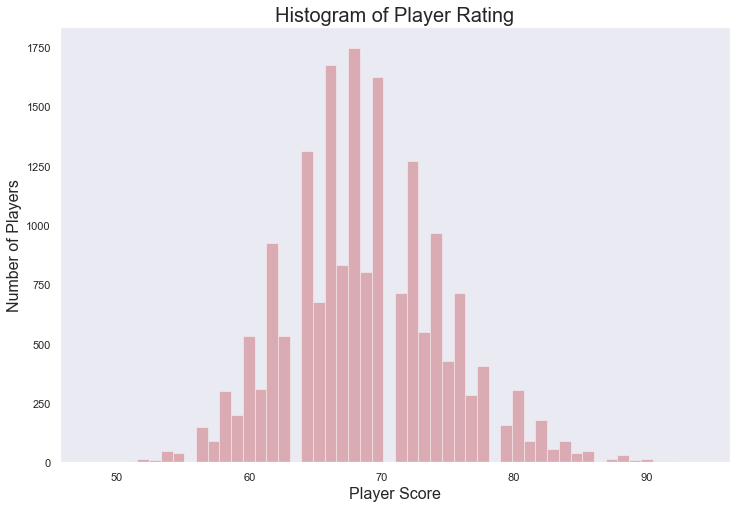

In [68]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df.Rating
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 52, kde = False, color = 'r')
ax.set_xlabel(xlabel = 'Player Score', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Histogram of Player Rating', fontsize = 20)
plt.show()

Let's see if wage and player score is correlated.

In [69]:
df = num_df

In [70]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 51 columns):
ID                          18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 

In [71]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled)

A moderate uphill (positive) relationship. Could be improved by dropping some of the highest paid players. However, from this we have something to work with.

In [72]:
df['Overall'].corr(true_df['Wage'])

0.571926011287615

In [73]:
df['Overall'].corr(true_df['General'])

0.4484570186151297

In [74]:
df['Wage'].corr(true_df['Value'])

0.8584417232332496

In order to get better results, we grouped player rating into skill levels (1-5).

In [75]:
def overallRating(df):
    if df['Rating'] >= 40 and df['Rating'] < 60:
        return 1
    elif df['Rating'] >= 60 and df['Rating'] < 70:
        return 2
    elif df['Rating'] >= 70 and df['Rating'] < 80:
        return 3
    elif df['Rating'] >= 80 and df['Rating'] < 90:
        return 4
    elif df['Rating'] >= 90:
        return 5
    else:
        return df.Rating

In [76]:
df1['Skill_Level'] = df1.apply(overallRating, axis=1)

In [77]:
df1

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,General,Mental,Passing,Mobility,Power,Rating,Shooting,Simple_Position,Major_Nation,Skill_Level
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,2202,5.0,...,89,71,87,91,74,94,88,0,1,5
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000000.0,405000.0,2228,5.0,...,88,73,81,91,83,94,88,0,1,5
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,5.0,...,85,72,80,94,69,92,84,0,1,5
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,1471,4.0,...,26,43,39,66,54,92,21,1,1,5
4,192985,K. De Bruyne,27,91,92,Manchester City,102000000.0,355000.0,2281,4.0,...,79,81,92,81,76,92,85,0,1,5
5,183277,E. Hazard,27,91,91,Chelsea,93000000.0,340000.0,2142,4.0,...,83,72,84,92,75,91,82,0,1,5
6,177003,L. Modrić,32,91,91,Real Madrid,67000000.0,420000.0,2280,4.0,...,81,80,89,84,77,91,78,0,0,5
7,176580,L. Suárez,31,91,91,FC Barcelona,80000000.0,455000.0,2346,5.0,...,85,78,74,84,81,91,87,0,0,5
8,155862,Sergio Ramos,32,91,91,Real Madrid,51000000.0,380000.0,2201,4.0,...,78,77,74,78,82,91,68,0,1,5
9,200389,J. Oblak,25,90,93,Atlético Madrid,68000000.0,94000.0,1331,3.0,...,14,41,23,64,61,92,14,1,0,5


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 90 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Body Type                   18207 non-null object
Jersey Number               18207 non-null float64
Joined                      18207 non-null object
Contract Valid Until        18207 non-null object
Height                      18207 non-null object
Weight                      18207 non-nu

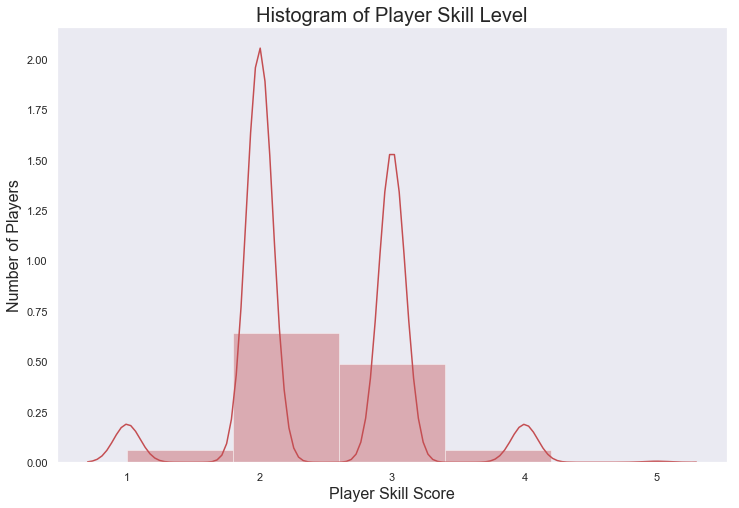

In [79]:
sns.set(style = "dark", palette = "deep", color_codes = True)
x = df1.Skill_Level
plt.figure(figsize = (12,8))
ax = sns.distplot(x, bins = 5, kde = True, color = 'r')
ax.set_xlabel(xlabel = 'Player Skill Score', fontsize = 16)
ax.set_ylabel(ylabel = 'Number of Players', fontsize = 16)
ax.set_title(label = 'Histogram of Player Skill Level', fontsize = 20)
plt.show()

In [80]:
non_floats = []
for col in df1:
    if df1[col].dtypes == "object":
        non_floats.append(col)
num_df = df1.drop(columns=non_floats)

In [81]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
ID                          18207 non-null int64
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Jersey Number               18207 non-null float64
Weight                      18207 non-null int64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 no

In [82]:
new_df = num_df
new_df = new_df.drop(new_df.columns.difference(['Defending', 'General', 'Mental', 'Passing', 'Mobility',
       'Power', 'Shooting', 'Value' , 'Wage']), axis=1)

In [83]:
x = new_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled)

In [84]:
X = new_df
y = df1['Skill_Level'].values

In [85]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
y_pred = knn.predict(X_test)

In [88]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 110  221    2    0    0]
 [  78 3167  498    0    0]
 [   2  832 2024   16    0]
 [   0    2  112  208    1]
 [   0    0    0    6    4]]
              precision    recall  f1-score   support

           1       0.58      0.33      0.42       333
           2       0.75      0.85      0.80      3743
           3       0.77      0.70      0.73      2874
           4       0.90      0.64      0.75       323
           5       0.80      0.40      0.53        10

   micro avg       0.76      0.76      0.76      7283
   macro avg       0.76      0.58      0.65      7283
weighted avg       0.76      0.76      0.75      7283



## Predicting Player Wage

In [146]:
new_df = num_df
new_df = new_df.drop(new_df.columns.difference(['Value', 'International Reputation', 'Overall', 'Major Nation']), axis=1)




In [126]:
x = new_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df = pd.DataFrame(x_scaled)

In [127]:
X = new_df
y = df1['Wage'].values

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
# fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
y_pred = knn.predict(X_test)

In [131]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[  85    5    2 ...    0    0    0]
 [   6 1387  342 ...    0    0    0]
 [   4  606  335 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        93
      1000.0       0.47      0.72      0.57      1922
      2000.0       0.25      0.29      0.27      1144
      3000.0       0.18      0.17      0.17       767
      4000.0       0.14      0.10      0.12       534
      5000.0       0.06      0.04      0.05       356
      6000.0       0.10      0.07      0.08       258
      7000.0       0.06      0.06      0.06       195
      8000.0       0.06      0.06      0.06       164
      9000.0       0.05      0.03      0.04       140
     10000.0       0.04      0.03      0.04       123
     11000.0       0.03      0.03      0.03       110
     12000.0       0.04      0.01      0.01       111
     13000.0   

In [132]:
from sklearn.model_selection import cross_val_score


In [133]:
k_range = list(range(10, 35)) #have to figure out what k_range is
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, new_df, y, cv=5, scoring='f1_weighted')
    k_scores.append(scores.mean())
print(k_scores)

[0.07219218331620908, 0.06871833976509698, 0.06856912276018043, 0.07004869029576162, 0.07105828543939896, 0.06778092029882885, 0.06865826155401605, 0.06652425626322553, 0.06578675277305315, 0.06855165970880206, 0.06733987715254938, 0.0657890710197713, 0.06510673272690978, 0.0649780198795138, 0.0660909481323489, 0.06505776633311769, 0.06653973560080301, 0.06540834142803739, 0.06782699621574521, 0.06639884899026231, 0.06659790216695552, 0.06561865444449029, 0.06567881061976828, 0.0667972365263987, 0.06700042459747567]


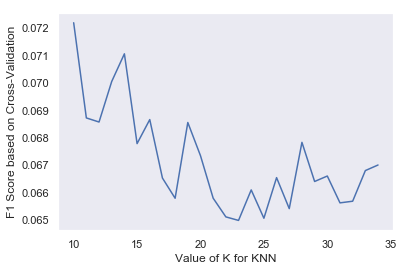

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score based on Cross-Validation')
plt.show()

In [136]:
k_range = list(range(10, 35))
param_grid = dict(n_neighbors=k_range)

knn = KNeighborsClassifier(n_neighbors=1)

In [137]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted')

In [138]:
grid.fit(new_df, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [139]:
means = grid.cv_results_['mean_test_score']
means

array([0.07193998, 0.06844672, 0.06829105, 0.06977372, 0.07079849,
       0.06749651, 0.06838182, 0.0662183 , 0.06549553, 0.06828659,
       0.06704841, 0.06549065, 0.06478617, 0.06466014, 0.0657811 ,
       0.06475372, 0.06624003, 0.06511966, 0.06752752, 0.06609787,
       0.06629021, 0.0652946 , 0.06537656, 0.06649126, 0.06669346])

In [140]:
grid.cv_results_['params']

[{'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20},
 {'n_neighbors': 21},
 {'n_neighbors': 22},
 {'n_neighbors': 23},
 {'n_neighbors': 24},
 {'n_neighbors': 25},
 {'n_neighbors': 26},
 {'n_neighbors': 27},
 {'n_neighbors': 28},
 {'n_neighbors': 29},
 {'n_neighbors': 30},
 {'n_neighbors': 31},
 {'n_neighbors': 32},
 {'n_neighbors': 33},
 {'n_neighbors': 34}]

In [141]:
for mean, params in zip(means, grid.cv_results_['params']):
    print(mean, params)

0.07193997911846159 {'n_neighbors': 10}
0.06844671557796045 {'n_neighbors': 11}
0.06829105409816187 {'n_neighbors': 12}
0.06977372451868023 {'n_neighbors': 13}
0.07079849269951688 {'n_neighbors': 14}
0.06749651301244564 {'n_neighbors': 15}
0.06838181570097365 {'n_neighbors': 16}
0.06621830250084348 {'n_neighbors': 17}
0.06549553020530441 {'n_neighbors': 18}
0.06828658888231745 {'n_neighbors': 19}
0.06704841486577887 {'n_neighbors': 20}
0.06549065356210636 {'n_neighbors': 21}
0.06478617409272094 {'n_neighbors': 22}
0.06466014187483853 {'n_neighbors': 23}
0.06578109823035044 {'n_neighbors': 24}
0.06475372185350892 {'n_neighbors': 25}
0.06624002740741926 {'n_neighbors': 26}
0.06511965557947871 {'n_neighbors': 27}
0.0675275232311806 {'n_neighbors': 28}
0.06609787461558098 {'n_neighbors': 29}
0.06629020871488753 {'n_neighbors': 30}
0.06529460205317664 {'n_neighbors': 31}
0.06537656051592071 {'n_neighbors': 32}
0.06649125793138233 {'n_neighbors': 33}
0.06669346369220053 {'n_neighbors': 34}


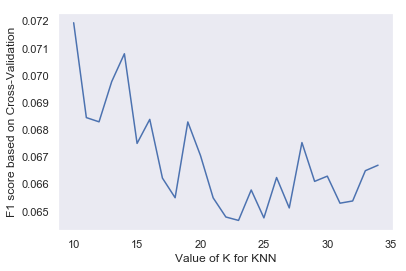

In [142]:
# plot the results
plt.plot(k_range, means)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 score based on Cross-Validation')
plt.show()

In [143]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.07193997911846159
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')


In [144]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[  85    5    2 ...    0    0    0]
 [   6 1387  342 ...    0    0    0]
 [   4  606  335 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        93
      1000.0       0.47      0.72      0.57      1922
      2000.0       0.25      0.29      0.27      1144
      3000.0       0.18      0.17      0.17       767
      4000.0       0.14      0.10      0.12       534
      5000.0       0.06      0.04      0.05       356
      6000.0       0.10      0.07      0.08       258
      7000.0       0.06      0.06      0.06       195
      8000.0       0.06      0.06      0.06       164
      9000.0       0.05      0.03      0.04       140
     10000.0       0.04      0.03      0.04       123
     11000.0       0.03      0.03      0.03       110
     12000.0       0.04      0.01      0.01       111
     13000.0   